# Data Cleaning and Preprocessing Tutorial

## Introduction
In this tutorial, we will explore various data cleaning and preprocessing techniques using the "Adult" dataset from scikit-learn. The dataset contains demographic information about individuals, and the goal is to predict whether their income exceeds $50,000 per year.

We will cover the following topics:
1. Loading the dataset
2. Handling missing values
3. Encoding categorical variables
4. Feature scaling
5. Handling imbalanced classes

Let's get started!

## Loading the Dataset

First, we'll load the "Adult" dataset using scikit-learn's `fetch_openml` function.


In [208]:
from sklearn.datasets import fetch_openml
import pandas as pd

In [209]:
data = fetch_openml(data_id=1590, as_frame=True)
X = data.data
y = data.target

df = pd.concat([X, y], axis=1)
df

age     workclass  fnlwgt     education  education-num  \
0       25       Private  226802          11th              7   
1       38       Private   89814       HS-grad              9   
2       28     Local-gov  336951    Assoc-acdm             12   
3       44       Private  160323  Some-college             10   
4       18           NaN  103497  Some-college             10   
...    ...           ...     ...           ...            ...   
48837   27       Private  257302    Assoc-acdm             12   
48838   40       Private  154374       HS-grad              9   
48839   58       Private  151910       HS-grad              9   
48840   22       Private  201490       HS-grad              9   
48841   52  Self-emp-inc  287927       HS-grad              9   

           marital-status         occupation relationship   race     sex  \
0           Never-married  Machine-op-inspct    Own-child  Black    Male   
1      Married-civ-spouse    Farming-fishing      Husband  White    Male   
2      Married-civ-spouse    Protective-serv      Husband  White    Male   
3      Married-civ-spouse  Machine-op-inspct      Husband  Black    Male   
4           Never-married                NaN    Own-child  White  Female   
...                   ...                ...          ...    ...     ...   
48837  Married-civ-spouse       Tech-support         Wife  White  Female   
48838  Married-civ-spouse  Machine-op-inspct      Husband  White    Male   
48839             Widowed       Adm-clerical    Unmarried  White  Female   
48840       Never-married       Adm-clerical    Own-child  White    Male   
48841  Married-civ-spouse    Exec-managerial         Wife  White  Female   

       capital-gain  capital-loss  hours-per-week native-country  class  
0                 0             0              40  United-States  <=50K  
1                 0             0              50  United-States  <=50K  
2                 0             0              40  United-States   >50K  
3              7688             0              40  United-States   >50K  
4                 0             0              30  United-States  <=50K  
...             ...           ...             ...            ...    ...  
48837             0             0              38  United-States  <=50K  
48838             0             0              40  United-States   >50K  
48839             0             0              40  United-States  <=50K  
48840             0             0              20  United-States  <=50K  
48841         15024             0              40  United-States   >50K  

[48842 rows x 15 columns]

In [210]:
df.head()

age  workclass  fnlwgt     education  education-num      marital-status  \
0   25    Private  226802          11th              7       Never-married   
1   38    Private   89814       HS-grad              9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm             12  Married-civ-spouse   
3   44    Private  160323  Some-college             10  Married-civ-spouse   
4   18        NaN  103497  Some-college             10       Never-married   

          occupation relationship   race     sex  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                NaN    Own-child  White  Female             0             0   

   hours-per-week native-country  class  
0              40  United-States  <=50K  
1              50  United-States  <=50K  
2              40  United-States   >50K  
3              40  United-States   >50K  
4              30  United-States  <=50K

In [211]:
df.shape

(48842, 15)

In [212]:
df['workclass'].unique()

['Private', 'Local-gov', NaN, 'Self-emp-not-inc', 'Federal-gov', 'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked']
Categories (8, object): ['Federal-gov', 'Local-gov', 'Never-worked', 'Private', 'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay']

## Handling Missing Values

In [213]:
df.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
class                0
dtype: int64

We can see that there are missing values in the dataset, represented by the '?' character. Let's replace them with NaN values.


In [214]:
X.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')

In [215]:
X.dtypes

age                  int64
workclass         category
fnlwgt               int64
education         category
education-num        int64
marital-status    category
occupation        category
relationship      category
race              category
sex               category
capital-gain         int64
capital-loss         int64
hours-per-week       int64
native-country    category
dtype: object

In [216]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
X.loc[:,['workclass', 'occupation', 'native-country']] = imputer.fit_transform(X[['workclass', 'occupation', 'native-country']])

## Handling Duplicates

In [217]:
df.duplicated().sum()

52

In [218]:
df = df.drop_duplicates()

## Handling outliers

In [219]:
df.dtypes

age                  int64
workclass         category
fnlwgt               int64
education         category
education-num        int64
marital-status    category
occupation        category
relationship      category
race              category
sex               category
capital-gain         int64
capital-loss         int64
hours-per-week       int64
native-country    category
class             category
dtype: object

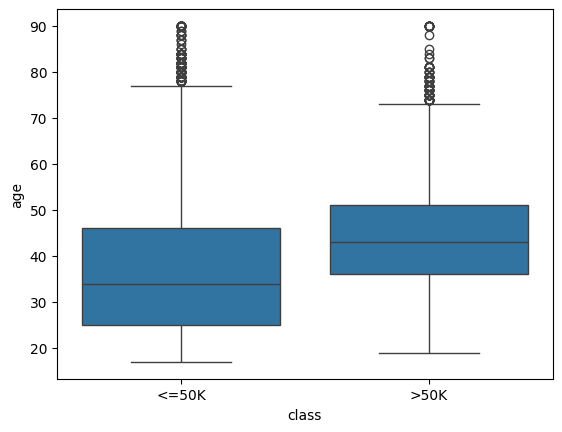

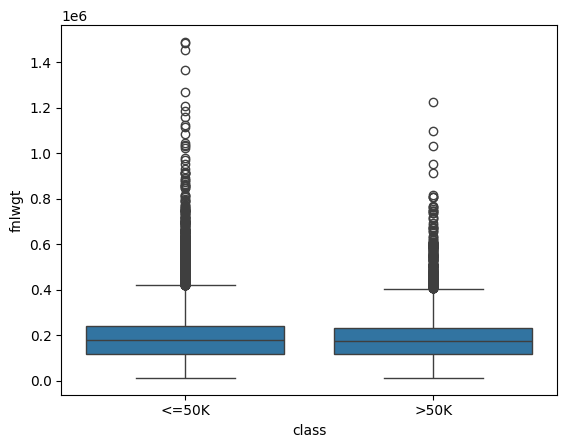

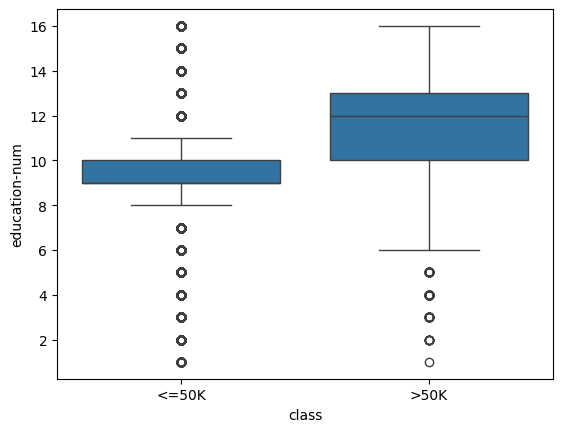

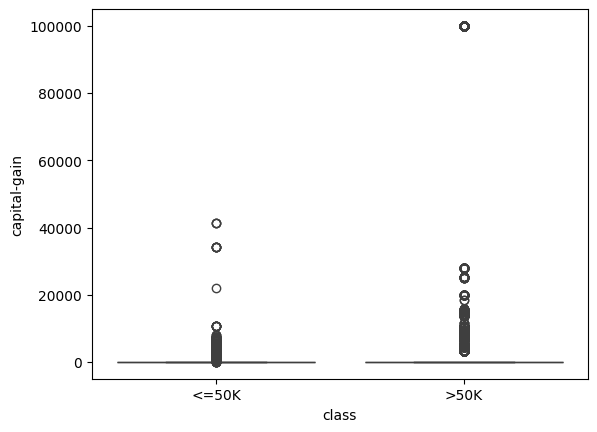

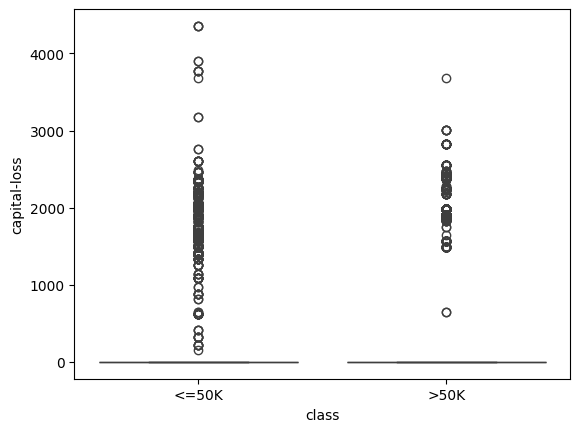

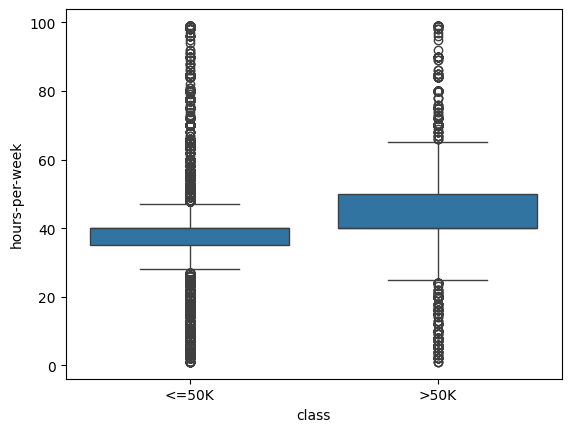

In [220]:
# Boxplots 1 by 1
import matplotlib.pyplot as plt
import seaborn as sns

numerical_features = df.select_dtypes(include=['int64']).columns     #['int64', 'float64']

for col in df.columns:
    if col in numerical_features:
        sns.boxplot(x=df['class'], y=df[col])
        plt.show()

In [221]:
import numpy as np

# Apply log transformation to numerical features
#for feature in numerical_features:
 #  df.loc[:,feature] = np.log(df[feature] + 1).astype('int64')

from scipy.stats import mstats

# Apply winsorization to numerical features
for feature in numerical_features:
    df.loc[:,feature] = mstats.winsorize(df[feature], limits=[0.10, 0.10])

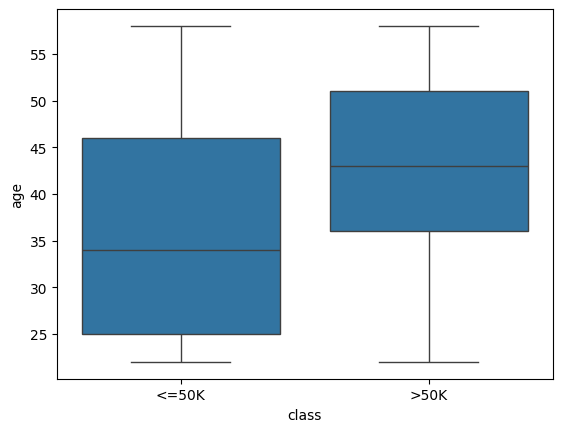

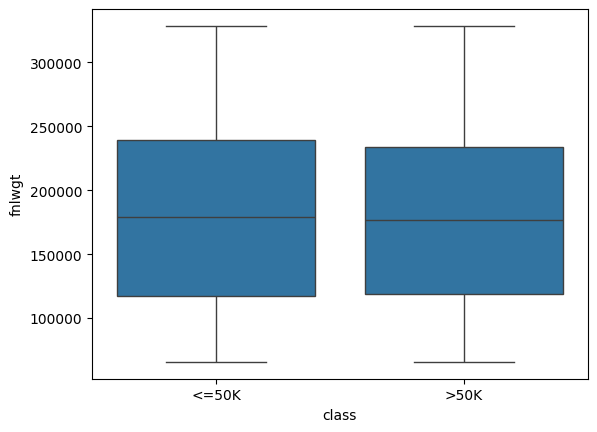

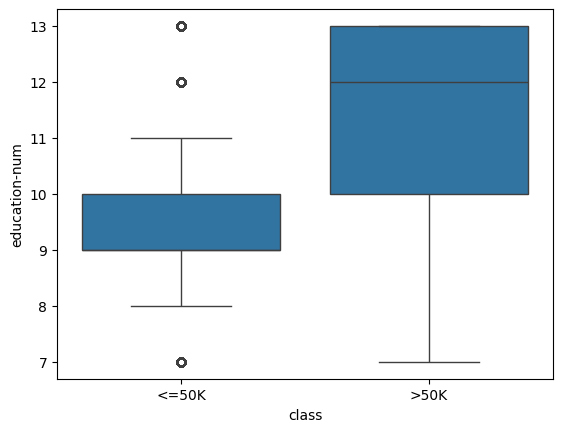

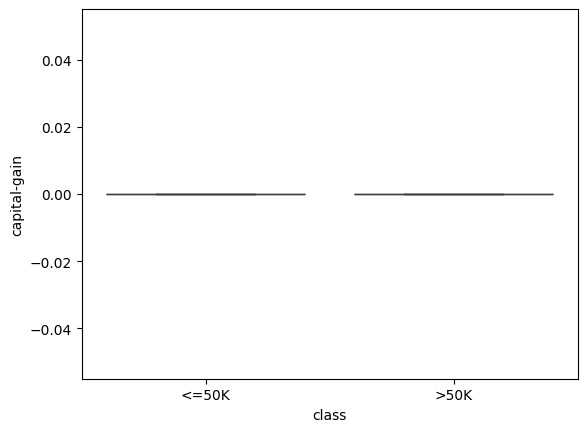

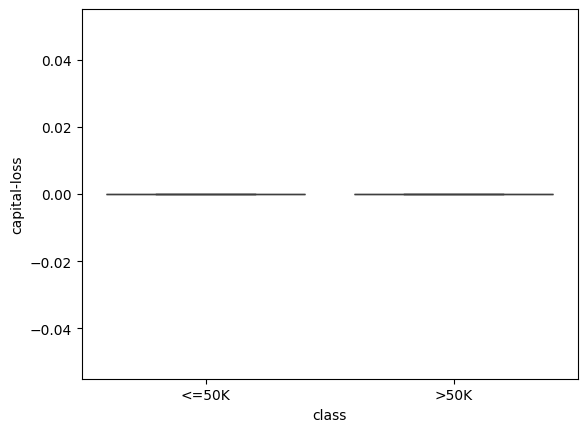

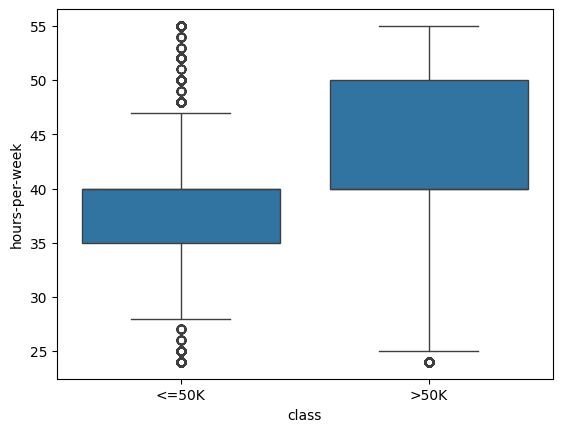

In [222]:
for col in df.columns:
    if col in numerical_features:
        sns.boxplot(x=df['class'], y=df[col])
        plt.show()

## Encoding Categorical Variables

### Ordinal Encoding

In [223]:
df.dtypes

age                  int64
workclass         category
fnlwgt               int64
education         category
education-num        int64
marital-status    category
occupation        category
relationship      category
race              category
sex               category
capital-gain         int64
capital-loss         int64
hours-per-week       int64
native-country    category
class             category
dtype: object

In [224]:
df['education'].value_counts()

education
HS-grad         15770
Some-college    10863
Bachelors        8013
Masters          2656
Assoc-voc        2060
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           954
Prof-school       834
9th               756
12th              655
Doctorate         594
5th-6th           507
1st-4th           245
Preschool          81
Name: count, dtype: int64

In [225]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_features = ['education']
ordinal_encoder = OrdinalEncoder()
df.loc[:, ordinal_features] = ordinal_encoder.fit_transform(df[ordinal_features]).astype('int64')

C:\Users\DELL\AppData\Local\Temp\ipykernel_6084\1413773058.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1 11  7 ... 11 11 11]' has dtype incompatible with category, please explicitly cast to a compatible dtype first.
  df.loc[:, ordinal_features] = ordinal_encoder.fit_transform(df[ordinal_features]).astype('int64')


In [226]:
df['education'].value_counts()

education
11    15770
15    10863
9      8013
12     2656
8      2060
1      1812
7      1601
0      1389
5       954
14      834
6       756
2       655
10      594
4       507
3       245
13       81
Name: count, dtype: int64

### One-Hot Encoding

In [227]:
len(df.columns)

15

In [228]:
df['workclass'].nunique()

8

In [229]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

nominal_features = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'class']
onehot_encoder = OneHotEncoder()
df_onehot_encoded = onehot_encoder.fit_transform(df[nominal_features])
df_onehot_encoded_df = pd.DataFrame(df_onehot_encoded.toarray(), columns=onehot_encoder.get_feature_names_out())

# Drop original nominal columns
df.drop(columns=nominal_features, axis=1, inplace=True)

df = pd.concat([df, df_onehot_encoded_df], axis=1)

C:\Users\DELL\AppData\Local\Temp\ipykernel_6084\3342564393.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=nominal_features, axis=1, inplace=True)


In [230]:
len(df.columns)

95

In [231]:
df.head()

age    fnlwgt  education  education-num  capital-gain  capital-loss  \
0  25.0  226802.0        1.0            7.0           0.0           0.0   
1  38.0   89814.0       11.0            9.0           0.0           0.0   
2  28.0  328466.0        7.0           12.0           0.0           0.0   
3  44.0  160323.0       15.0           10.0           0.0           0.0   
4  22.0  103497.0       15.0           10.0           0.0           0.0   

   hours-per-week  workclass_Federal-gov  workclass_Local-gov  \
0            40.0                    0.0                  0.0   
1            50.0                    0.0                  0.0   
2            40.0                    0.0                  1.0   
3            40.0                    0.0                  0.0   
4            30.0                    0.0                  0.0   

   workclass_Never-worked  ...  native-country_South  native-country_Taiwan  \
0                     0.0  ...                   0.0                    0.0   
1                     0.0  ...                   0.0                    0.0   
2                     0.0  ...                   0.0                    0.0   
3                     0.0  ...                   0.0                    0.0   
4                     0.0  ...                   0.0                    0.0   

   native-country_Thailand  native-country_Trinadad&Tobago  \
0                      0.0                             0.0   
1                      0.0                             0.0   
2                      0.0                             0.0   
3                      0.0                             0.0   
4                      0.0                             0.0   

   native-country_United-States  native-country_Vietnam  \
0                           1.0                     0.0   
1                           1.0                     0.0   
2                           1.0                     0.0   
3                           1.0                     0.0   
4                           1.0                     0.0   

   native-country_Yugoslavia  native-country_nan  class_<=50K  class_>50K  
0                        0.0                 0.0          1.0         0.0  
1                        0.0                 0.0          1.0         0.0  
2                        0.0                 0.0          0.0         1.0  
3                        0.0                 0.0          0.0         1.0  
4                        0.0                 0.0          1.0         0.0  

[5 rows x 95 columns]

In [232]:
len(df.columns[df.dtypes == 'object'])

0

In [233]:
len(df.columns[df.dtypes == 'float64'])

95

## Feature Scaling

To ensure fair comparison and contribution of features, we'll scale the numerical features.

In [234]:
from sklearn.preprocessing import StandardScaler

# Ideally, we should analyze the distribution of each feature and select the appropriate scaling method
# (e.g., StandardScaler for Gaussian-like features, MinMaxScaler for non-Gaussian features)
# In this example, we'll use StandardScaler for all numerical features for simplicity
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df = pd.DataFrame(df_scaled.tolist(), columns=df.columns)

In [235]:
df.head()

age    fnlwgt  education  education-num  capital-gain  capital-loss  \
0 -1.110745  0.528120  -2.397162      -1.610995           0.0           0.0   
1 -0.017006 -1.160150   0.183765      -0.587625           0.0           0.0   
2 -0.858344  1.781050  -0.848606       0.947430           0.0           0.0   
3  0.487797 -0.291181   1.216135      -0.075940           0.0           0.0   
4 -1.363147 -0.991517   1.216135      -0.075940           0.0           0.0   

   hours-per-week  workclass_Federal-gov  workclass_Local-gov  \
0       -0.039139               -0.17389            -0.262089   
1        1.135415               -0.17389            -0.262089   
2       -0.039139               -0.17389             3.815499   
3       -0.039139               -0.17389            -0.262089   
4       -1.213693               -0.17389            -0.262089   

   workclass_Never-worked  ...  native-country_South  native-country_Taiwan  \
0               -0.014318  ...             -0.048607              -0.036524   
1               -0.014318  ...             -0.048607              -0.036524   
2               -0.014318  ...             -0.048607              -0.036524   
3               -0.014318  ...             -0.048607              -0.036524   
4               -0.014318  ...             -0.048607              -0.036524   

   native-country_Thailand  native-country_Trinadad&Tobago  \
0                -0.024804                       -0.023531   
1                -0.024804                       -0.023531   
2                -0.024804                       -0.023531   
3                -0.024804                       -0.023531   
4                -0.024804                       -0.023531   

   native-country_United-States  native-country_Vietnam  \
0                      0.337832               -0.042021   
1                      0.337832               -0.042021   
2                      0.337832               -0.042021   
3                      0.337832               -0.042021   
4                      0.337832               -0.042021   

   native-country_Yugoslavia  native-country_nan  class_<=50K  class_>50K  
0                  -0.021717           -0.133633     0.561048   -0.561048  
1                  -0.021717           -0.133633     0.561048   -0.561048  
2                  -0.021717           -0.133633    -1.782377    1.782377  
3                  -0.021717           -0.133633    -1.782377    1.782377  
4                  -0.021717           -0.133633     0.561048   -0.561048  

[5 rows x 95 columns]